In [7]:
import numpy as np
from scipy.optimize import fmin_tnc


class LogisticRegressionUsingGD:

    @staticmethod
    def sigmoid(x):
        # Activation function used to map any real value between 0 and 1
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def net_input(theta, x):
        # Computes the weighted sum of inputs Similar to Linear Regression

        return np.dot(x, theta)

    def probability(self, theta, x):
        # Calculates the probability that an instance belongs to a particular class

        return self.sigmoid(self.net_input(theta, x))

    def cost_function(self, theta, x, y):
        # Computes the cost function for all the training samples
        m = x.shape[0]
        total_cost = -(1 / m) * np.sum(
            y * np.log(self.probability(theta, x)) + (1 - y) * np.log(
                1 - self.probability(theta, x)))
        return total_cost

    def gradient(self, theta, x, y):
        # Computes the gradient of the cost function at the point theta
        m = x.shape[0]
        return (1 / m) * np.dot(x.T, self.sigmoid(self.net_input(theta, x)) - y)

    def fit(self, x, y, theta):
        """trains the model from the training data

        Uses the fmin_tnc function that is used to find the minimum for any function
        It takes arguments as
            1) func : function to minimize
            2) x0 : initial values for the parameters
            3) fprime: gradient for the function defined by 'func'
            4) args: arguments passed to the function

        Parameters
        ----------
        x: array-like, shape = [n_samples, n_features]
            Training samples

        y: array-like, shape = [n_samples, n_target_values]
            Target classes

        theta: initial weights

        Returns
        -------

        self: An instance of self
        """

        opt_weights = fmin_tnc(func=self.cost_function, x0=theta, fprime=self.gradient,
                               args=(x, y.flatten()))
        print (opt_weights)
        self.w_ = opt_weights[0]
        return self

    def predict(self, x):
        """ Predicts the class labels

        Parameters
        ----------
        x: array-like, shape = [n_samples, n_features]
            Test samples

        Returns
        -------
        predicted class labels


        """
        theta = self.w_[:, np.newaxis]
        return self.probability(theta, x)

    def accuracy(self, x, actual_classes, probab_threshold=0.5):
        """Computes the accuracy of the classifier

        Parameters
        ----------
        x: array-like, shape = [n_samples, n_features]
            Training samples

        actual_classes : class labels from the training data set

        probab_threshold: threshold/cutoff to categorize the samples into different classes

        Returns
        -------
        accuracy: accuracy of the model

        """
        predicted_classes = (self.predict(x) >= probab_threshold).astype(int)
        predicted_classes = predicted_classes.flatten()
        accuracy = np.mean(predicted_classes == actual_classes)
        return accuracy * 100


[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.         62.27101367

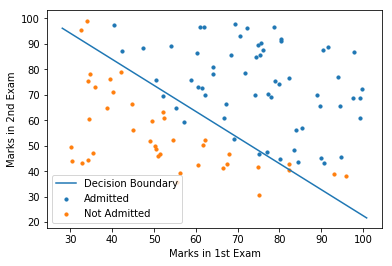

The accuracy score using scikit-learn is 0.89
The model parameters using scikit learn
[[-4.19885867e-08  2.05354461e-01  2.00583554e-01]]


c:\python\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
#from LogisticRegression.Model import LogisticRegressionUsingGD
from sklearn.metrics import accuracy_score


def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df


if __name__ == "__main__":
    # load the data from the file
    data = load_data("data/marks.txt", None)

    # X = feature values, all the columns except the last column
    X = data.iloc[:, :-1]

    # y = target values, last column of the data frame
    y = data.iloc[:, -1]

    # filter out the applicants that got admitted
    admitted = data.loc[y == 1]

    # filter out the applicants that din't get admission
    not_admitted = data.loc[y == 0]

    # plots
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10,
                label='Not Admitted')

    # preparing the data for building the model

    X = np.c_[np.ones((X.shape[0], 1)), X]
    y = y[:, np.newaxis]
    theta = np.zeros((X.shape[1], 1))
    
    # print X and y
    print (X)
    print(y)
    print (theta)
    # Logistic Regression from scratch using Gradient Descent
    model = LogisticRegressionUsingGD()
    model.fit(X, y, theta)
    accuracy = model.accuracy(X, y.flatten())
    parameters = model.w_
    print("The accuracy of the model is {}".format(accuracy))
    print("The model parameters using Gradient descent")
    print("\n")
    print(parameters)

    # plotting the decision boundary
    # As there are two features
    # wo + w1x1 + w2x2 = 0
    # x2 = - (wo + w1x1)/(w2)

    x_values = [np.min(X[:, 1] - 2), np.max(X[:, 2] + 2)]
    y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.xlabel('Marks in 1st Exam')
    plt.ylabel('Marks in 2nd Exam')
    plt.legend()
    plt.show()

    # Using scikit-learn
    model = LogisticRegression()
    model.fit(X, y)
    parameters = model.coef_
    predicted_classes = model.predict(X)
    accuracy = accuracy_score(y.flatten(),predicted_classes)
    print('The accuracy score using scikit-learn is {}'.format(accuracy))
    print("The model parameters using scikit learn")
    print(parameters)



In [3]:
x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([5, 4, 3])
x1_new = x1[:, np.newaxis]
print (x1_new)

[[1]
 [2]
 [3]
 [4]
 [5]]


In [4]:
x1_new + x2

array([[ 6,  5,  4],
       [ 7,  6,  5],
       [ 8,  7,  6],
       [ 9,  8,  7],
       [10,  9,  8]])

In [5]:
 A = np.ones((3,4,5,6))
print (A)

[[[[1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]]]


 [[[1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]]]


 [[[1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 1.]
   [1. 1. 1. 1